<a href="https://colab.research.google.com/github/IoanaAndra/HackMed-2021---1000-Genomes-Project-/blob/main/HackMed2021_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 20130606_sample_info (2).xlsx to 20130606_sample_info (2).xlsx
User uploaded file "20130606_sample_info (2).xlsx" with length 990298 bytes


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# df = pd.read_excel('20130606_sample_info (2).xlsx')
# print(df)

# **Population & genotypes**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


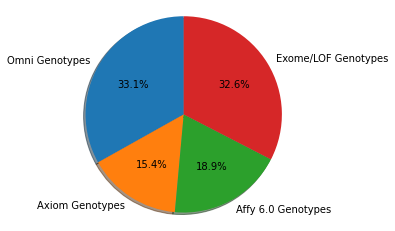

In [ ]:
population = pd.read_excel('20130606_sample_info (2).xlsx', sheet_name='Sample Info', index_col=3)
population = population.groupby("Population Description").count()

gender = pd.read_excel('20130606_sample_info (2).xlsx', sheet_name='Sample Info', index_col=4)
gender_nr = gender.groupby("Gender").count()

omni = pd.read_excel('20130606_sample_info (2).xlsx', sheet_name='HD Genotypes', index_col=2)
omni_nr = omni.pivot_table(index = ['Has Omni Genotypes'], aggfunc ='size')
omni_nr = pd.array(omni_nr, dtype=float)


axiom = pd.read_excel('20130606_sample_info (2).xlsx', sheet_name='HD Genotypes', index_col=3)
axiom_nr = axiom.pivot_table(index = ['Has Axiom Genotypes'], aggfunc ='size')
axiom_nr = pd.array(axiom_nr, dtype=float)

affy = pd.read_excel('20130606_sample_info (2).xlsx', sheet_name='HD Genotypes', index_col=4)
affy_nr = affy.pivot_table(index = ['Has Affy 6.0 Genotypes'], aggfunc ='size')
affy_nr = pd.array(affy_nr, dtype=float)

exome = pd.read_excel('20130606_sample_info (2).xlsx', sheet_name='HD Genotypes', index_col=5)
exome_nr = exome.pivot_table(index = ['Has Exome/LOF Genotypes'], aggfunc ='size')
exome_nr = pd.array(exome_nr, dtype=float)



labels = 'Omni Genotypes', 'Axiom Genotypes', 'Affy 6.0 Genotypes', 'Exome/LOF Genotypes'
sizes = [omni_nr, axiom_nr, affy_nr, exome_nr]
explode = (0, 0, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()


# print(omni_nr)
# print(axiom_nr)
# print(affy_nr)
# print(exome_nr)
# print(gender)

# print (gender)
# print(omni)

# **PLOT**

                                                    Sample  ...  Other Comments
Population Description                                      ...                
African Ancestry in Southwest US                       112  ...               0
African Caribbean in Barbados                          123  ...               0
Bengali in Bangladesh                                  144  ...               0
British in England and Scotland                        107  ...               0
Chinese Dai in Xishuangbanna, China                    109  ...               0
Colombian in Medellin, Colombia                        148  ...               0
Esan in Nigeria                                        173  ...               0
Finnish in Finland                                     105  ...               0
Gambian in Western Division, The Gambia                180  ...               0
Gujarati Indian in Houston,TX                          113  ...               0
Han Chinese in Bejing, China            

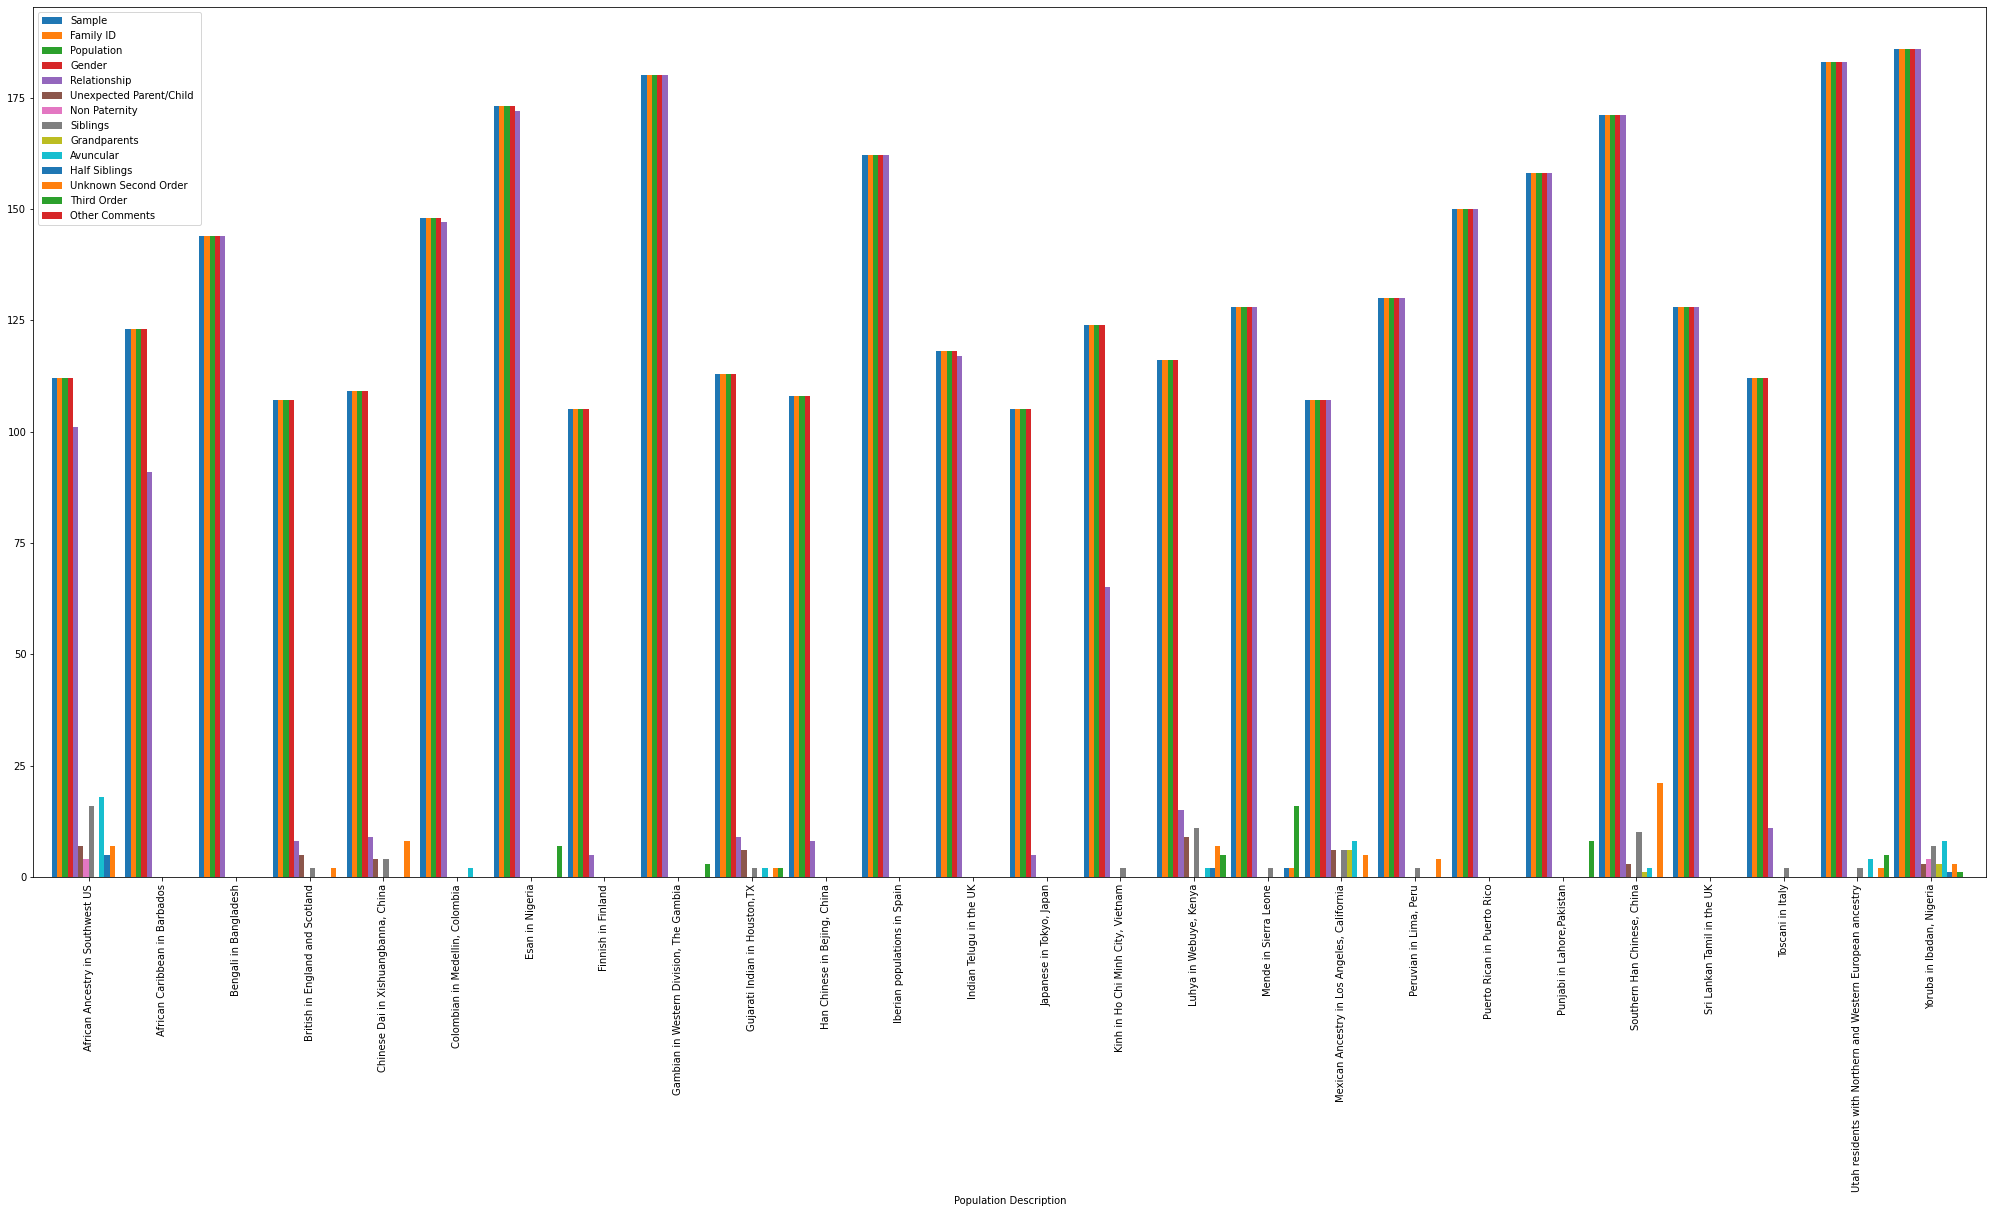

In [75]:
print(population)
# .plot(kind = "bar")
# .unstack()
pd = population.groupby(['Population Description']).mean('Samples').plot.bar(figsize=(35, 16), width=1)

plt.show()